<a href="https://colab.research.google.com/github/hasin-abrar/Machine-Learning/blob/master/What_is_torch_nn_really.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")  

(50000, 784)


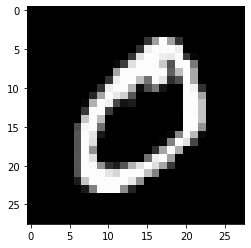

In [ ]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[1].reshape((28,28)), cmap = 'gray')
print(x_train.shape)

In [ ]:
import torch
x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)
n,c = x_train.shape
print(x_train, y_train)
print(n,c)
print(y_train.min(), y_train.max().item())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
50000 784
tensor(0) 9


In [ ]:
print(y_train.min(), y_train.max().item())

tensor(0) 9


In [ ]:
import math
weights = torch.randn(784, 10)/math.sqrt(784)
weights.requires_grad_()
bias = torch.zeros(10 ,requires_grad=True)

In [ ]:
def log_softmax(x):
  return x - x.exp().sum(-1).log().unsqueeze(-1)
def model(xb):
  return xb @ weights + bias

In [ ]:
bs = 64
xb = x_train[0:bs]
preds = model(xb)
print(preds[0], preds.shape)

tensor([-0.2454,  0.1451,  0.0392, -0.0350, -0.0814, -0.4227, -0.0967, -0.1951,
        -0.0247,  0.1167], grad_fn=<SelectBackward>) torch.Size([64, 10])


In [ ]:
def nll(input, target): # did not understand clearly
  return -input[range(target.shape[0]), target ].mean()
loss_func = nll

In [ ]:
def accuracy(out, yb):
  preds = torch.argmax(out, dim=1)
  return (preds == yb).float().mean()

tensor(0.0625)
